In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# use glob to find all files from folder
path = r'C:/Users/lizba/Desktop/projects/weather_lab/decades'
all_files = glob.glob(path + "/*.csv")
# use concat to combine all files
df = pd.concat((pd.read_csv(f) for f in all_files))
# check sample
df.sample(5)

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
3869,8/5/2020,78,60,0,0,0
414,2/18/1941,-7,-20,0,0,4
154,6/4/1910,58,47,0.01,0,0
495,5/10/1961,79,43,T,0,0
3074,6/2/1918,71,53,0,0,0


In [ ]:
# quick sumstats
combo.describe()

In [3]:
# create datetime
# Convert dates to datetime
df['datetime'] = pd.to_datetime(df['Date'])
# extract date componants

df['day'] = df['datetime'].map(lambda x: x.day)
df['month'] = df['datetime'].map(lambda x: x.month)
df['year'] = df['datetime'].map(lambda x: x.year)


## Just Xmas Day

In [4]:
# filter to just xmas for every year

xmas = df[(df['day']==25) & (df['month']==12)]

# uh-oh the numbers are objects!

In [5]:
# extract needed columns
xmas_snow= xmas[['Snow (inches)','year']].copy()
xmas_snow

,Snow (inches),year
358,M,1871
724,M,1872
1089,M,1873
1454,M,1874
1819,M,1875
...,...,...
2184,0,2015
2550,T,2016
2915,T,2017
3280,0,2018


In [11]:
xmas_snow=xmas_snow.apply(pd.to_numeric, errors='coerce')

In [14]:
# check datatypes
xmas_snow.dtypes

Snow (inches)    float64
year               int64
dtype: object

In [17]:
# drop nan values to plot
xmas_snow=xmas_snow.dropna()

In [25]:
xmas_snow
exclude_zero = xmas_snow[xmas_snow['Snow (inches)']!=0.00]

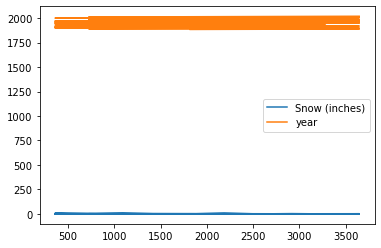

In [22]:
# plot snow
xmas_snow.plot()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

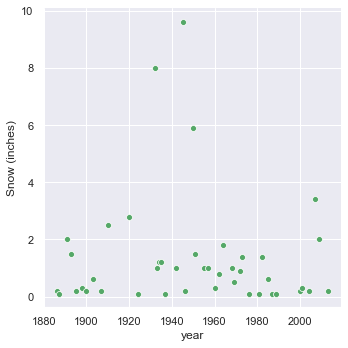

In [32]:
sns.set(style="darkgrid")


sns.relplot(x='year',y='Snow (inches)', data=exclude_zero,color='g')


In [ ]:
jan = combo[combo['month']==4]
jan

In [ ]:
rando = jan['TMIN'].sample(100)
rando

In [ ]:
rando.plot()

In [ ]:
# check for nan
combo['TMIN'].tolist()

In [ ]:
combo['TMIN'].isnull().sum()

In [ ]:
# bday weather for cal
nov_25 = combo[(combo['day']==25) & (combo['month']==11)]
nov_25.sample(10)
nov_25['TMIN'].plot()
nov_25['TMAX'].plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


sns.set(style="darkgrid")


sns.relplot(x='year',y='TMAX', data=nov_25,color='r')
plt.title('High Tempatures on Cals birthday!')
sns.relplot(x='year',y='TMIN', data=nov_25,color='b')
plt.title('Low Tempatures on Cals birthday!')


In [ ]:
# try out numpy
highs = combo['TMAX'].to_numpy()
lows = combo['TMIN'].to_numpy()

In [ ]:
#print max tempature
print("max temp", np.max(highs))

In [ ]:
lows

In [ ]:
# remove nan value
lows = lows[np.logical_not(np.isnan(lows))]
lows

In [ ]:
#low tempature
print("min tempature", np.min(lows))

In [ ]:
col_mean = np.nanmean(lows, axis=0)
print(col_mean)

In [ ]:
print("minimum temp", np.min(lows))

In [ ]:
plt.plot(lows)

In [ ]:
np.isnan(lows)

np.sum(lows)

In [ ]:
weather['SNWD'].plot()

In [ ]:
weather['SNOW'].max()

In [ ]:
combo.columns

In [ ]:
# what is the average tempature tommorrow?
combo

# bday weather for cal
Dec_4 = combo[(combo['day']==4) & (combo['month']==12)]
Dec_4.sample(10)
Dec_4['TMIN'].plot()
Dec_4['TMAX'].plot()

In [ ]:
# find average low and high
Dec_4['TMIN'].mean()
Dec_4['TMAX'].mean()

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.violinplot(x="month", y="TMIN", data=combo, color='m')

In [ ]:

ax = sns.violinplot(x="day", y="TMAX", data=Dec_4,color='m')
plt.title('Minneapolis High Tempatures on Dec 4th 1910-2019')

In [ ]:
sns.catplot(x="day", y="TMIN", kind="box", data=Dec_4)